# Collaboration and Competition

---

This notebook runs John's solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.  It uses the Unity ML-Agents environment to train two cooperative agents to play a tennis-like game.

**Need more description here - refer to readme?**






...


This code depends upon a custom Unity environment provided by the Udacity staff that embodies the variation on tennis.  It will open a separate Unity window for visualizing the environment as the agents train or play.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train
from maddpg import Maddpg

%matplotlib inline

# create a new Unity environment
# it needs to be done once, outside any loop, as closing an environment then restarting causes
# a Unity exception about the handle no longer being active.
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", seed=0, 
                       no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                       
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Train the agents

The next cells will invoke the training program to create the agents.  All of the real code is in Python flat files in this project directory.

In [2]:
TRAIN = False
EXPLORE = True

Ready to train E23 over 4 training sets for 30001 episodes each, with fixed params:
    Max episodes  =  30001
    Batch size    =  1000
    Bad step prob =  0.01
    Noise decay   =  1.0
    Noise scale   =  0.001
    Weight decay  =  1e-05
    Gamma         =  0.99
    Tau           =  0.001

///// Beginning training set  E23.01  with:
      LR actor         =  0.0005
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  111
9	Running avg/max: 0.000/0.000,  mem:     23/     0 ( 0.0%), avg 1.0 eps/min   
Noise collect done: cur_seq = 0, num = 200, total_steps = 200

Noise collect done: cur_seq = 0, num = 200, total_steps = 200
1000	Average score:   0.002,        mem:   1125/    36 ( 3.2%), avg 1215.6 eps/min;  0.4 hr rem   
2000	Average score:   0.005,        mem:   1375/    67 ( 4.9%), avg 1197.1 eps/min;  0.4 hr rem   
3000	Average score:   0.004,        mem:   1551/    93 ( 6.0%), avg 1251.3 eps/min;  0.4 hr

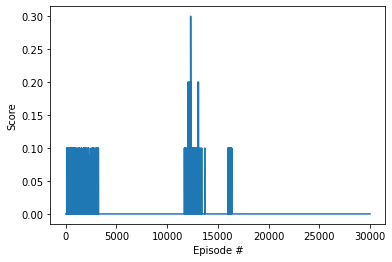


///// Beginning training set  E23.02  with:
      LR actor         =  0.0005
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  23100
7	Running avg/max: 0.000/0.000,  mem:     17/     0 ( 0.0%), avg 1.0 eps/min   
Noise collect done: cur_seq = 0, num = 200, total_steps = 200

Noise collect done: cur_seq = 0, num = 200, total_steps = 200
1000	Average score:   0.005,        mem:   1098/    56 ( 5.1%), avg 1204.7 eps/min;  0.4 hr rem   
2000	Average score:   0.000,        mem:   1261/    59 ( 4.7%), avg 1309.6 eps/min;  0.4 hr rem   
3000	Average score:   0.000,        mem:   1413/    59 ( 4.2%), avg 1441.5 eps/min;  0.3 hr rem   
4000	Average score:   0.000,        mem:   1538/    59 ( 3.8%), avg 1513.5 eps/min;  0.3 hr rem   
5000	Average score:   0.000,        mem:   1707/    59 ( 3.5%), avg 1539.6 eps/min;  0.3 hr rem   
6000	Average score:   0.000,        mem:   1874/    59 ( 3.1%), avg 1571.0 eps/min;  0.

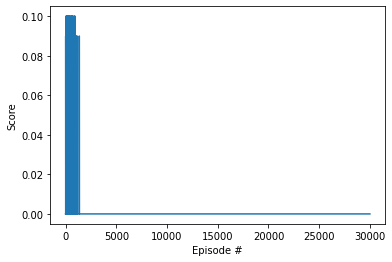


///// Beginning training set  E23.03  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  111
9	Running avg/max: 0.010/0.100,  mem:     15/     1 ( 6.7%), avg 1.0 eps/min   
Noise collect done: cur_seq = 0, num = 200, total_steps = 200

Noise collect done: cur_seq = 0, num = 200, total_steps = 200
1000	Average score:   0.003,        mem:   1122/    36 ( 3.2%), avg 1263.0 eps/min;  0.4 hr rem   
2000	Average score:   0.002,        mem:   1354/    73 ( 5.4%), avg 1281.4 eps/min;  0.4 hr rem   
3000	Average score:   0.006,        mem:   1588/   121 ( 7.6%), avg 1266.8 eps/min;  0.4 hr rem   
4000	Average score:   0.003,        mem:   1826/   154 ( 8.4%), avg 1279.0 eps/min;  0.3 hr rem   
5000	Average score:   0.008,        mem:   2054/   205 (10.0%), avg 1291.1 eps/min;  0.3 hr rem   
5310	Running avg/max: 0.004/0.100,  mem:   2111/   216 (10.2%), avg 1296.9 eps/min   
Noi

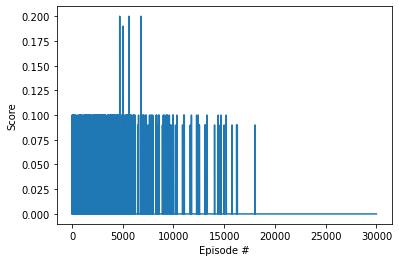


///// Beginning training set  E23.04  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Seed             =  23100
10	Running avg/max: 0.000/0.000,  mem:     21/     0 ( 0.0%), avg 1.0 eps/min   
Noise collect done: cur_seq = 0, num = 200, total_steps = 200

Noise collect done: cur_seq = 0, num = 200, total_steps = 200
1000	Average score:   0.000,        mem:   1080/     6 ( 0.6%), avg 1390.4 eps/min;  0.3 hr rem   
2000	Average score:   0.000,        mem:   1278/    11 ( 0.9%), avg 1258.1 eps/min;  0.4 hr rem   
3000	Average score:   0.000,        mem:   1462/    25 ( 1.7%), avg 1166.2 eps/min;  0.4 hr rem   
4000	Average score:   0.002,        mem:   1664/    42 ( 2.5%), avg 1094.8 eps/min;  0.4 hr rem   
5000	Average score:   0.003,        mem:   1870/    71 ( 3.8%), avg 1082.7 eps/min;  0.4 hr rem   
5752	Running avg/max: 0.004/0.100,  mem:   2001/    88 ( 4.4%), avg 1092.3 eps/min   


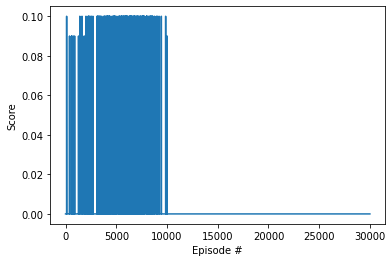



DONE!


In [3]:
# This cell will explore several combinations of hyperparams by training all of them

TIME_STEPS         = 200
SAVE_ANALYSIS      = False
MODEL_DISPLAY_STEP = 0 #200k is approx 10k episodes at bad_step_prob = 0.01

if EXPLORE:
    
    # fixed for the session:
    RUN_PREFIX     = "E24"
    EPISODES       = 30001
    BATCH          = 1000
    BAD_STEP_PROB  = 0.01
    NOISE_DECAY    = 1.0 #need to test 0.99999; 0.9999 is too small
    NOISE_SCALE    = 0.001
    WEIGHT_DECAY   = 1.0e-5
    GAMMA          = 0.99
    TAU            = 0.001
    
    # session loop variables:
    SEEDS          = (111, 23100) #(0, 111, 468, 5555, 23100, 44939)
    LR_ACTORS      = (0.0005, 0.0001,)
    LR_CRITICS     = (0.0001, 0.00005)
    LEARN_EVERYS   = (100,)
    LEARN_ITERS    = (1, 2)
    
    
    num_sets = len(LR_ACTORS) * len(LR_CRITICS) * len(SEEDS) * len(LEARN_EVERYS) * len(LEARN_ITERS)
    print("Ready to train {} over {} training sets for {} episodes each, with fixed params:"
          .format(RUN_PREFIX, num_sets, EPISODES))
    print("    Max episodes  = ", EPISODES)
    print("    Batch size    = ", BATCH)
    print("    Bad step prob = ", BAD_STEP_PROB)
    print("    Noise decay   = ", NOISE_DECAY)
    print("    Noise scale   = ", NOISE_SCALE)
    print("    Weight decay  = ", WEIGHT_DECAY)
    print("    Gamma         = ", GAMMA)
    print("    Tau           = ", TAU)
    
    set_id = 0
    for LR_ACTOR in LR_ACTORS:
        for LR_CRITIC in LR_CRITICS:
            for LEARN_EVERY in LEARN_EVERYS:
                for LEARN_ITER in LEARN_ITERS:
                    for SEED in SEEDS:
                        
                        # set the replay buffer size to that it fills after ~5000 bad episodes
                        # (at ~14 experiences/episode), based on the bad step retention rate
                        buffer_size = int(60000 - 50000*(1.0 - BAD_STEP_PROB))
                        
                        set_id += 1
                        RUN_NAME = "{}.{:02d}".format(RUN_PREFIX, set_id)
                        print("\n///// Beginning training set ", RUN_NAME, " with:")
                        print("      LR actor         = ", LR_ACTOR)
                        print("      LR critic        = ", LR_CRITIC)
                        print("      Learning every     ", LEARN_EVERY, " time steps")
                        print("      Learn iterations = ", LEARN_ITER)
                        print("      Seed             = ", SEED)
    
                        ##### instantiate the agents and perform the training

                        maddpg = Maddpg(state_size, action_size, 2, bad_step_prob=BAD_STEP_PROB,
                                        random_seed=SEED, batch_size=BATCH, buffer_size=buffer_size,
                                        noise_decay=NOISE_DECAY, learn_every=LEARN_EVERY, 
                                        learn_iter=LEARN_ITER, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC,
                                        weight_decay=WEIGHT_DECAY, gamma=GAMMA, noise_scale=NOISE_SCALE,
                                        tau=TAU, model_display_step=MODEL_DISPLAY_STEP)

                        scores = train(maddpg, env, run_name=RUN_NAME, max_episodes=EPISODES, 
                                       winning_score=0.5, max_time_steps=TIME_STEPS,
                                       checkpoint_interval=5000)

                        ##### plot the training reward history

                        fig = plt.figure()
                        ax = fig.add_subplot(111)
                        plt.plot(np.arange(len(scores)), scores)
                        plt.ylabel('Score')
                        plt.xlabel('Episode #')
                        plt.show()
                        
                        ##### store the action/noise data, if being used
                        
                        if SAVE_ANALYSIS:
                            maddpg.save_anal_data(RUN_PREFIX)
                        
    print("\n\nDONE!")

# HEY JOHN - TODO!

- update main.py to match the above code {ALL CELLS}
- Test running from cmd line (may need a script?)
- Clean up the bottom part of this notebook

In [4]:
# load a pre-trained (or partially trained) model and run it in inference mode to watch it perform



### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
"""
for i in range(10):                                        # play game for several episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations             3     # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    num_steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        num_steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Episode {}: {:5.3f}, took {} steps'.format(i, np.max(scores), num_steps))
"""

"\nfor i in range(10):                                        # play game for several episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations             3     # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    num_steps = 0\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_i

When finished, you can close the environment.

In [6]:
env.close()